## Multivariate Faceting Visualization

In Bivariate Faceting Exercise, you saw how FacetGrid could be used to subset your dataset across levels of a **categorical variable**, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a **multivariate visualization**.

### Faceting for Multivariate Data

**FacetGrid** also allows for faceting a variable not just by **columns**, but also by **rows**. We can set one **categorical variable** on each of the **two facet axes** for one additional method of depicting **multivariate** trends.

> **NOTE:** Setting **margin_titles = True** means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data
fuel_econ = pd.read_csv('../../Datasets/fuel_econ.csv')

fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_econ.VClass.dtype.name

'object'

In [4]:
# convert the type of VClass to category
cats = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
fuel_econ.VClass = pd.Categorical(fuel_econ['VClass'], ordered=True, categories=cats)

fuel_econ.VClass.dtype.name

'category'

In [10]:
# Create a column in the data 
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x:x.split()[0])

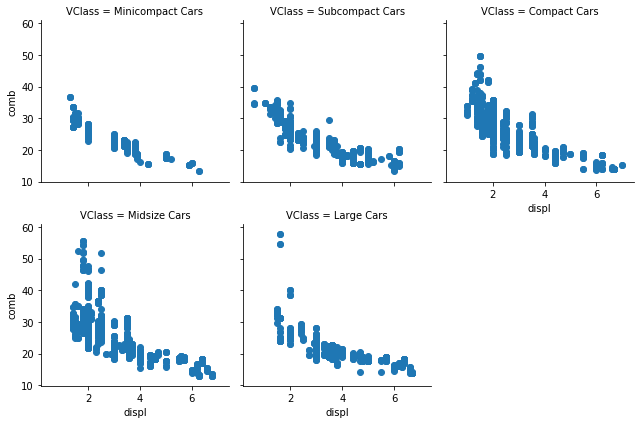

In [11]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', height=3, col_wrap=3)
g.map(plt.scatter, 'displ', 'comb');

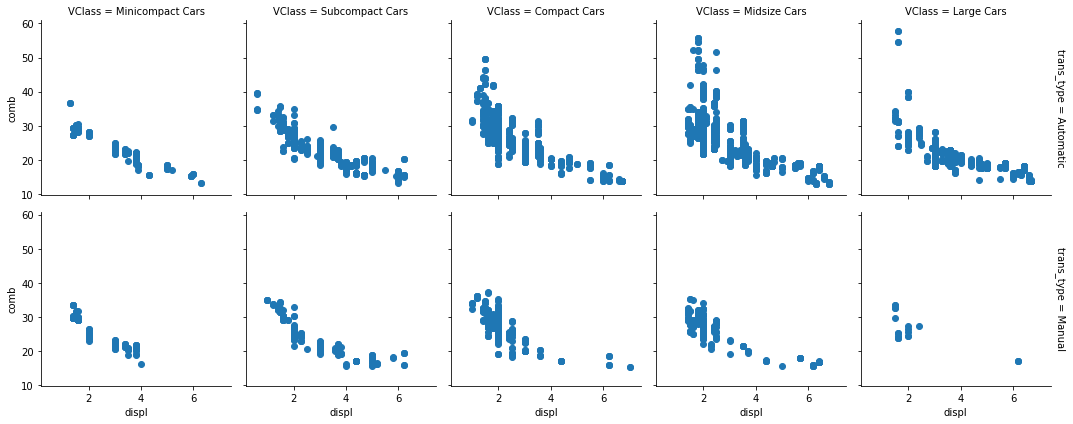

In [15]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', margin_titles=True, height=3)
g.map(plt.scatter, 'displ', 'comb');

### Other Adaptations of Bivariate Plots

You also saw one other way of expanding univariate plots into bivariate plots in Bivariate Section: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. 

This adaptation can also be done for bivariate plots like the **heat map, clustered bar chart, and line plot,** to allow them to depict multivariate relationships.

#### Clustered Bar with pointplot, barplot and boxplot

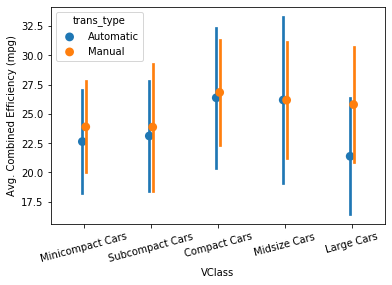

In [108]:
sb.pointplot(data=fuel_econ, x = 'VClass', y = 'comb', ci='sd', hue='trans_type', linestyles="", dodge=True)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Efficiency (mpg)');

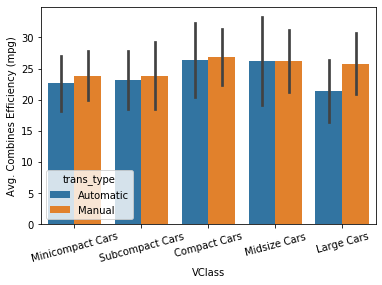

In [31]:
sb.barplot(data=fuel_econ, x = 'VClass', y = 'comb', ci='sd', hue='trans_type')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combines Efficiency (mpg)');

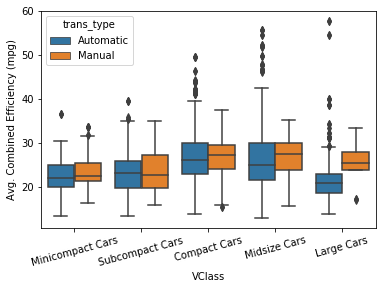

In [42]:
sb.boxplot(data=fuel_econ, x = 'VClass', y = 'comb', hue='trans_type')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Efficiency (mpg)');

#### Heatmaps

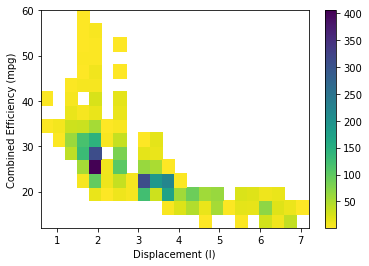

In [43]:
bin_x = np.arange(0.6, 7+0.3, 0.3)
bin_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[bin_x, bin_y], cmap='viridis_r', cmin=0.5);
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Efficiency (mpg)');
plt.colorbar();

In [106]:
displ_bins = pd.cut(fuel_econ['displ'], bin_x, right=False, include_lowest=False, labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bin_y, right=False, include_lowest=False, labels=False).astype(int)

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

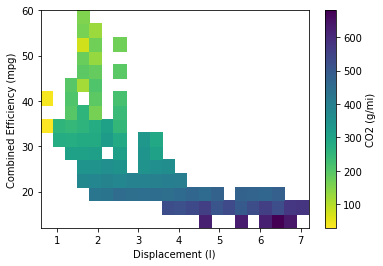

In [109]:
bin_x = np.arange(0.6, 7+0.3, 0.3)
bin_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[bin_x, bin_y], cmap='viridis_r', cmin=0.5, weights=co2_weights);
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Efficiency (mpg)');
plt.colorbar(label='CO2 (g/mi)');